This is the first assignment for DATA201. The first two laboratory sessions should help you prepare for it. 

In order to submit it, please use the http://apps.ecs.vuw.ac.nz/submit/DATA201 and submit only this single jupyter notebook with your code added into it at the appropriate places. 

The due date is Friday 22nd March, before midnight. 

In this assignment we are going to start analysing a real dataset. We will continue in Assignment 2.

You task here is to perform some exploratory data analysis for the dataset, by loading it, making some plots, and learning about the problem. 

Escherichia Coli (E. Coli) is a bacterium found in the intestines of many organisms, including humans. Some strains of it are harmful to humans, and are a major cause of food poisoning. More saliently for New Zealand rivers, it is present in many farm animals, and can be expelled in faecal matter, whereupon it grows aerobically for some time before dying off. This lifetime seems to be between 1 and 3 days depending on conditions. 

The health implications of the presence of E. Coli in water are large, either directly, or as an indicator for the presence of other harmful organisms. In August 2017, the New Zealand Government approved amendments to the National Policy Statement for Freshwater Management, the so-called ‘Clean Water’ package. 

The swimmability criteria place rivers into 5 categories (A–E, also called Blue, Green, Yellow, Orange, and Red, of which the first three are deemed ‘swimmable’), based on the frequency of meeting each of four E. coli thresholds:

|Category |Samples over 540 | Median | 95th Percentile | Samples over 260 |
-----|-----|------|-----|------|
| Blue (A) | < 5% | $\leq$130 | $\leq$540 | <20% |
| Green (B)| 5-10% | $\leq$130 | $\leq$1000 | 20-30% |
| Yellow (C) | 10-20% | $\leq$130 | $\leq$1200 | 20-34% |
| Orange (D) | 20-30% | >130 | >1200 | >34% |
| Red (E) | >30% | >130 | <1200 | >50% |

In [401]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests                      # for reading the .csv file from url
import io
from datetime import timedelta
import matplotlib.dates as mdates
%matplotlib inline

Read in the EColiHorizons dataset into the variable df. Once successful, the df.head() command should match the one below (1 mark)

In [50]:
url = "http://sms.victoria.ac.nz/foswiki/pub/Courses/DATA201_2019T1/WebHome/EColiHorizons.csv"
s   = requests.get(url).content                                # obtain the content in bytes dtype
df  = pd.read_csv(io.StringIO(s.decode('utf-8')))              # save as a DataFrame
df.Date = pd.to_datetime(df.Date, format='%d/%m/%y %H:%M')     # adjust the format of Date column, str -> Timestamp
df.head()

,Location,Test,Date,Count,Land height,Land type
0,Arawhata Drain at Hokio Beach Road,ECOLI,2006-02-01 09:45:00,430.0,Lowland,Rural
1,Arawhata Drain at Hokio Beach Road,ECOLI,2006-03-01 10:10:00,350.0,Lowland,Rural
2,Arawhata Drain at Hokio Beach Road,ECOLI,2006-03-22 11:05:00,410.0,Lowland,Rural
3,Arawhata Drain at Hokio Beach Road,ECOLI,2006-05-24 10:45:00,230.0,Lowland,Rural
4,Arawhata Drain at Hokio Beach Road,ECOLI,2006-06-27 11:20:00,65.0,Lowland,Rural


Plot the log(EColi count) over time for the Arawhata Drain at Hokio Beach Road and Manawatu at u/s PNCC STP
Make sure that you get the labels on the x axis to be useful (2 marks)

In [101]:
# Create a new DataFrame for "Arawhata Drain at Hokio Beach Road"
#        & print out the count of readings
df_HBR = df[df.Location == "Arawhata Drain at Hokio Beach Road"]
print("There are " + str(df_HBR.Location.count()) + " readings in Arawhata Drain at Hokio Beach Road.")
df_HBR.head()

There are 92 readings in Arawhata Drain at Hokio Beach Road.


,Location,Test,Date,Count,Land height,Land type
0,Arawhata Drain at Hokio Beach Road,ECOLI,2006-02-01 09:45:00,430.0,Lowland,Rural
1,Arawhata Drain at Hokio Beach Road,ECOLI,2006-03-01 10:10:00,350.0,Lowland,Rural
2,Arawhata Drain at Hokio Beach Road,ECOLI,2006-03-22 11:05:00,410.0,Lowland,Rural
3,Arawhata Drain at Hokio Beach Road,ECOLI,2006-05-24 10:45:00,230.0,Lowland,Rural
4,Arawhata Drain at Hokio Beach Road,ECOLI,2006-06-27 11:20:00,65.0,Lowland,Rural


In [102]:
# Create a new DataFrame for "Manawatu at u/s PNCC STP"
#        & print out the count of readings
df_STP = df[df.Location == "Manawatu at u/s PNCC STP"]
print("There are " + str(df_STP.Location.count()) + " readings in Manawatu at u/s PNCC STP.")
df_STP.head()

There are 103 readings in Manawatu at u/s PNCC STP.


,Location,Test,Date,Count,Land height,Land type
1656,Manawatu at u/s PNCC STP,ECOLI,2007-07-18 09:45:00,5200.0,Lowland,Rural
1657,Manawatu at u/s PNCC STP,ECOLI,2007-08-22 09:30:00,120.0,Lowland,Rural
1658,Manawatu at u/s PNCC STP,ECOLI,2007-09-19 10:10:00,40.0,Lowland,Rural
1659,Manawatu at u/s PNCC STP,ECOLI,2007-10-17 08:35:00,1100.0,Lowland,Rural
1660,Manawatu at u/s PNCC STP,ECOLI,2007-11-21 09:55:00,85.0,Lowland,Rural


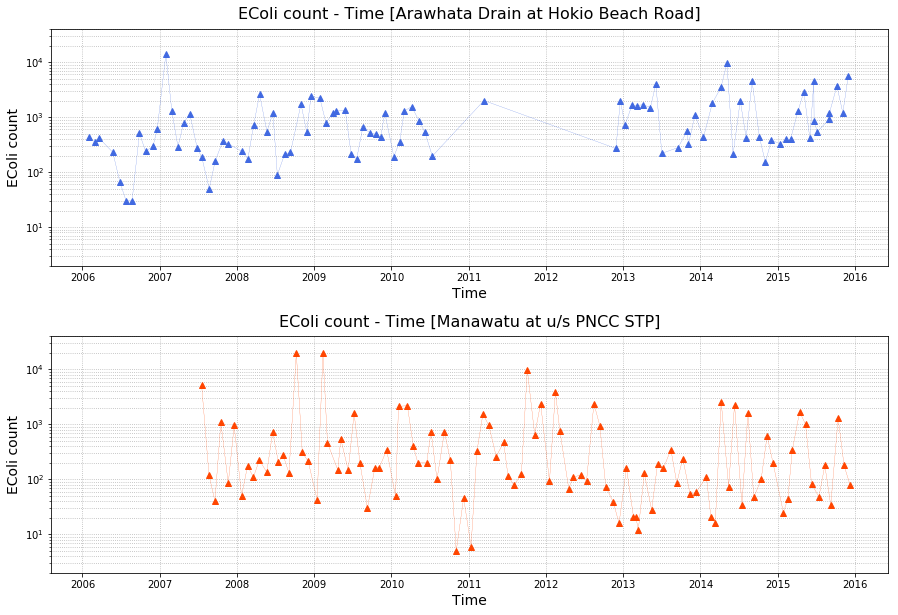

In [440]:
fig, ax = plt.subplots(2, 1, figsize = (15, 10))             # create a new figure & set the figure size

ax[0].plot(df_HBR.Date, df_HBR.Count, linewidth = 0.2, color='royalblue', marker='^', linestyle='solid')  
ax[0].set_xlabel('Time',              fontsize = 14) 
ax[0].set_ylabel('EColi count', fontsize = 14) 
ax[0].set_title('EColi count - Time [Arawhata Drain at Hokio Beach Road]', fontsize = 16, pad = 10)     # pad: offset of the title from the top of the axes
ax[0].set_yscale('log')
ax[0].set_xlim(pd.concat([df_HBR, df_STP]).Date.min() - timedelta(days = 180),
               pd.concat([df_HBR, df_STP]).Date.max() + timedelta(days = 180))      # to set and make sure the 2 subplots are in the same time range
ax[0].set_ylim(2, max(df_HBR.Count.max(), df_STP.Count.max()) + 20000)
ax[0].xaxis.grid(linestyle = ":")
ax[0].yaxis.grid(which = "both", linestyle = ":")

ax[1].plot(df_STP.Date, df_STP.Count, linewidth = 0.2, color='orangered', marker='^', linestyle='solid')  
ax[1].set_xlabel('Time',              fontsize = 14) 
ax[1].set_ylabel('EColi count', fontsize = 14) 
ax[1].set_title('EColi count - Time [Manawatu at u/s PNCC STP]',      fontsize = 16, pad = 10)     # pad: offset of the title from the top of the axes
ax[1].set_yscale('log')
ax[1].set_xlim(pd.concat([df_HBR, df_STP]).Date.min() - timedelta(days = 180),
               pd.concat([df_HBR, df_STP]).Date.max() + timedelta(days = 180))      # to set and make sure the 2 subplots are in the same time range
ax[1].set_ylim(2, max(df_HBR.Count.max(), df_STP.Count.max()) + 20000)
ax[1].xaxis.grid(linestyle = ":")
ax[1].yaxis.grid(which = "both", linestyle = ":")

plt.subplots_adjust(hspace = 0.3)                           # adjust the space between the 2 subplots
plt.show()

Explore the data.
Summarise it and report back about it.

You might want to identify:
- how many sites there are
- how often they were sampled
- what the range of observations is between the sites
- how many different types of site there are by land properties

(2 marks)


In [274]:
# How many sites there are?
print("There are " + str(df.Location.nunique()) + " sites are there in the tests.")

There are 85 sites are there in the tests.


In [332]:
# How often they were sampled?
# Create a new DataFrame to record the information for each Sampling Location
df_information = pd.DataFrame(columns = ['Location', 'Ave Sampling Freq', 'Observations Count'])
for location in df.Location.unique():
    df_each = df[df.Location == location]  # each df_each records the infomation in each location
    df_each.loc[:,"Time Diff"] = df_each.loc[:,"Date"].diff()      # There was SettingWithCopyWarning
    df_information.loc[df_information.shape[0] + 1] = {'Location':df_each.Location.unique()[0], 'Ave Sampling Freq':df_each["Time Diff"].mean(), 'Observations Count':df_each.Location.count()}
print(df_information.describe()) 
print("The average sampling interval over all the 85 locations is 32days 13hours.")
print()
print("The average sampling intervals of the first 5 locations are as below: ")
print(df_information.head())  
print()
print("The average sampling intervals of the last 5 locations are as below: ")
print(df_information.tail())  

             Ave Sampling Freq
count                       85
mean   32 days 13:12:32.472183
std     4 days 05:47:49.132527
min    28 days 08:52:09.921259
25%    30 days 08:59:00.594059
50%    30 days 21:56:50.256410
75%    33 days 03:42:36.880733
max    56 days 23:35:09.523809
The average sampling interval over all the 85 locations is 32days 13hours.

The average sampling intervals of the first 5 locations are as below: 
                              Location       Ave Sampling Freq  \
1   Arawhata Drain at Hokio Beach Road 39 days 10:48:57.362637   
2                Hautapu at Alabasters 30 days 10:09:28.141592   
3  Hautapu at US Rangitikei River Conf 30 days 08:28:26.722689   
4             Hokio at Lake Horowhenua 56 days 23:35:09.523809   
5         Kahuterawa at Johnstons Rata 30 days 08:36:27.640449   

  Observations Count  
1                 92  
2                114  
3                120  
4                 64  
5                 90  

The average sampling intervals of the 

In [483]:
# What the range of observations is between the sites?
print(df.groupby('Location').count()['Count'].describe())
print()
print("The range of observations between the sites is " + str(df.groupby('Location').count()['Count'].max() - df.groupby('Location').count()['Count'].min()) + ".")

count     85.000000
mean     101.129412
std       15.501757
min       59.000000
25%       90.000000
50%      102.000000
75%      114.000000
max      128.000000
Name: Count, dtype: float64

The range of observations between the sites is 69.


In [397]:
# How many different types of site there are by land properties?
pd.pivot_table(df,values='Location',index='Land type',columns='Land height', aggfunc='count')

Land height,Lowland,Upland
Land type,,
Forest,632,1249
Rural,4728,1987


In [398]:
# continue
print("There are 4 types of site:")
print("632  Lowerland Forest;")
print("4728 Lowerland Rural;")
print("1249 Upland Forest;")
print("1987 Upland Rural;")

There are 4 types of site:
632  Lowerland Forest;
4728 Lowerland Rural;
1249 Upland Forest;
1987 Upland Rural;


For the two sites identified above, compute a linear fit to the log count of the data. Plot this trend line over the data and interpret it. Use np.polyfit to compute the line. Remember that you can find out about it with ?np.polyfit
(2 marks)

In [472]:
# Description: 
#          to return the linearly fitted log(count) 
# Input:   Date column in DataFrame (in Datetime dtype)
#          Count column in DataFrame
# Output:  Linearly fitted log(count)
# e.g.:    linear_fit_log_count(df_HBR.Date, df_HBR.Count)
#          linear_fit_log_count(df_STP.Date, df_STP.Count)

def linear_fit_log_count(Date, Count):
    x_num    = mdates.date2num(Date)       # Datetime dtype -> int because np.polyfit() doesn't take Datetime
    y        = np.log10(Count)
    m, b     = np.polyfit(x_num, y, 1) 
    y_fit    = m * x_num + b
    return y_fit

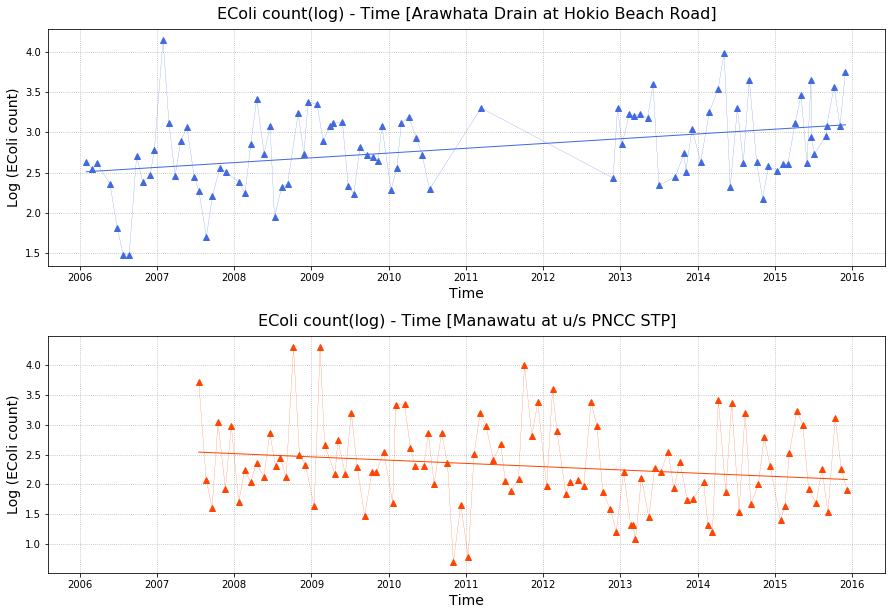

In [473]:
# df_HBR.Date, df_HBR.Count
# df_STP.Date, df_STP.Count
fig, ax = plt.subplots(2, 1, figsize = (15, 10))             # create a new figure & set the figure size

ax[0].plot(df_HBR.Date, np.log10(df_HBR.Count), linewidth = 0.2, color='royalblue', marker='^', linestyle='solid')  
ax[0].plot(df_HBR.Date, linear_fit_log_count(df_HBR.Date, df_HBR.Count), linewidth = 1, color='royalblue', linestyle='solid') 
ax[0].set_xlabel('Time',              fontsize = 14) 
ax[0].set_ylabel('Log (EColi count)', fontsize = 14) 
ax[0].set_title('EColi count(log) - Time [Arawhata Drain at Hokio Beach Road]', fontsize = 16, pad = 10)     # pad: offset of the title from the top of the axes
#ax[0].set_yscale('log')
ax[0].set_xlim(pd.concat([df_HBR, df_STP]).Date.min() - timedelta(days = 180),
               pd.concat([df_HBR, df_STP]).Date.max() + timedelta(days = 180))      # to set and make sure the 2 subplots are in the same time range
#ax[0].set_ylim(2, max(df_HBR.Count.max(), df_STP.Count.max()) + 20000)
ax[0].xaxis.grid(linestyle = ":")
ax[0].yaxis.grid(which = "both", linestyle = ":")

ax[1].plot(df_STP.Date, np.log10(df_STP.Count), linewidth = 0.2, color='orangered', marker='^', linestyle='solid') 
ax[1].plot(df_STP.Date, linear_fit_log_count(df_STP.Date, df_STP.Count), linewidth = 1, color='orangered', linestyle='solid') 
ax[1].set_xlabel('Time',              fontsize = 14) 
ax[1].set_ylabel('Log (EColi count)', fontsize = 14) 
ax[1].set_title('EColi count(log) - Time [Manawatu at u/s PNCC STP]',      fontsize = 16, pad = 10)     # pad: offset of the title from the top of the axes
#ax[1].set_yscale('log')
ax[1].set_xlim(pd.concat([df_HBR, df_STP]).Date.min() - timedelta(days = 180),
               pd.concat([df_HBR, df_STP]).Date.max() + timedelta(days = 180))      # to set and make sure the 2 subplots are in the same time range
#ax[1].set_ylim(2, max(df_HBR.Count.max(), df_STP.Count.max()) + 20000)
ax[1].xaxis.grid(linestyle = ":")
ax[1].yaxis.grid(which = "both", linestyle = ":")

plt.subplots_adjust(hspace = 0.3)                           # adjust the space between the 2 subplots
plt.show()

Interpret the results
(1 mark)

In [482]:
print("The EColi count in Arawhata Drain at Hokio Beach Road increases around half an order of magnitude in average, from 2006 to end 2015;\n the count increases from 10 to the power of 2.5 to 10 to the power of 3.1.")
print("However, the EColi count in Manawatu at u/s PNCC STP decreases around half an order of magnitude in average, from mid 2007 to end 2015;\n the count decreases from 10 to the power of 2.5 to 10 to the power of 2.1.")

The EColi count in Arawhata Drain at Hokio Beach Road increases around half an order of magnitude in average, from 2006 to end 2015;
 the count increases from 10 to the power of 2.5 to 10 to the power of 3.1.
However, the EColi count in Manawatu at u/s PNCC STP decreases around half an order of magnitude in average, from mid 2007 to end 2015;
 the count decreases from 10 to the power of 2.5 to 10 to the power of 2.1.


Discuss briefly the ethical implications of using this data, and not reporting what you discover. Also consider how this data could be used to perform monitoring of water quality in New Zealand. Is it sufficient? (2 marks)

Before using the data, there are lots of questions need to be considered. Such as, how the data was collected? What kind/kinds of experiment the collectors do? Were they the same person or there are many different person involved in it? (like data collected in different places or data collected over years even in the same places.) Is there a standard procedure to collect the data? Were the collectors properly trained? About the data itself, were they representative and being sampled in a similar condition? Such as, where were the samples collected in the river? All around river bank or some at river bank but others in the center deep water of the river? Whether there were any dishonesty or rushing when collecting the data. Were they affected by some stakeholder who will benefit or being punished by the result? And of course, the machines which will analyze the data after collecting should also be taken into account. If any decision to be made from this data, or any act to be published, all these hidden factors and reasons need to be cared.

This dataset is valuable if the correctness can be proved somehow. For example, by only comparing the 2 area plotted above, the EColi pollution situation of the first area become worse over the past 10 years; while in the same period, that of the second area became better. Then, further and deeper investigation and analysis can be designed and done to conclude why they were like that? Was there any action in the second area that the first area government can learn something from? If plotting the trend of all the 85 area where the data collected, is there any pattern can be found? Is there any common or similarity in the better performed area, or any similarity in the worse performed regions? There are huge amount of information behind just the numbers in the data collected. And there are lots of ways to do the data mining. If the data was fully analysed but didn't find too many useful information, more experiments and analysing methods can be designed with the experience of analysing the current data on hand.